      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
(6335, 4)
label
REAL    3171
FAKE    3164
Name: count, dtype: int64
id       0
title    0
text     0
label    0
dtype: int64
Training samples: 5068
Testing samples: 1267
Model Accuracy: 91.48 %

── Custom Predictions ──
FAKE → BREAKING: Donald Trump secre

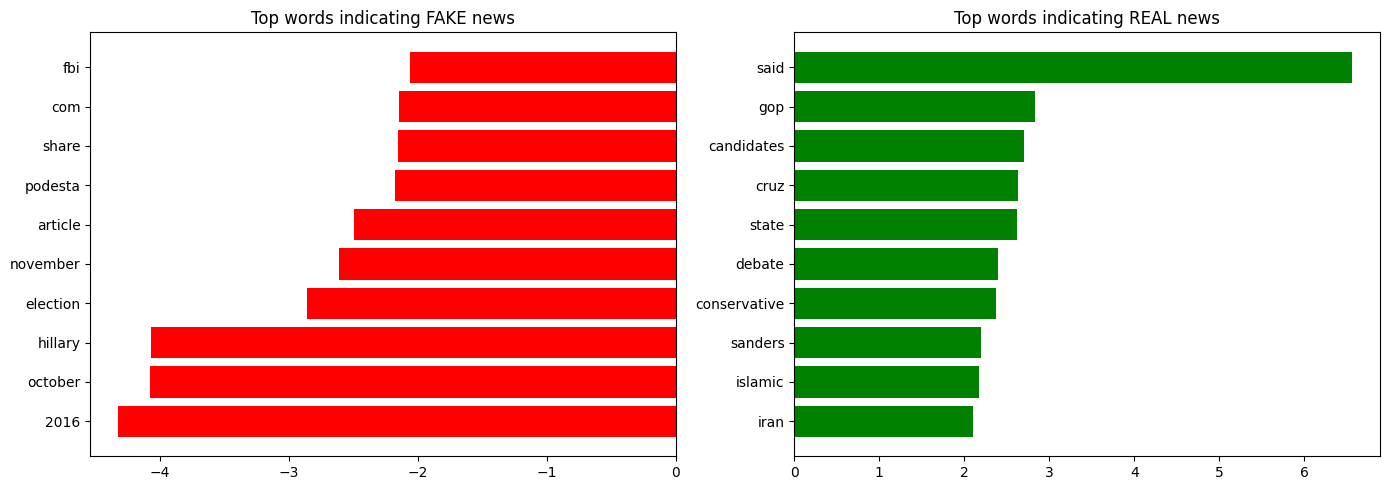

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ── Load Data ──────────────────────────────────────────────────
df = pd.read_csv("https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv")

# ── Explore Data ───────────────────────────────────────────────
print(df.head())
print(df.shape)
print(df["label"].value_counts())
print(df.isnull().sum())

# ── Prepare Text Data ──────────────────────────────────────────
df["content"] = df["title"] + " " + df["text"]

# ── Convert Text to Numbers ────────────────────────────────────
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(df["content"])
Y = df["label"]

# ── Split Data ─────────────────────────────────────────────────
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# ── Train Model ────────────────────────────────────────────────
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# ── Evaluate Model ─────────────────────────────────────────────
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# ── Test Custom Headlines ──────────────────────────────────────
tests = [
    "BREAKING: Donald Trump secretly a lizard person, documents confirm",
    "The US economy added 200,000 jobs in January according to Labor Department",
    "Pope Francis shocks world, announces he is secretly Muslim",
    "Apple releases new iPhone with record breaking sales this quarter",
    "Scientists discover drinking bleach cures all diseases",
    "Congress passes new tax reform bill after months of debate",
    "Hillary Clinton runs secret pizza basement criminal operation"
]

print("\n── Custom Predictions ──")
for news in tests:
    test = vectorizer.transform([news])
    result = model.predict(test)[0]
    print(f"{result} → {news[:60]}...")

# ── Visualize Important Words ──────────────────────────────────
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_fake = np.argsort(coefficients)[:10]
top_real = np.argsort(coefficients)[-10:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.barh([feature_names[i] for i in top_fake],
         coefficients[top_fake], color="red")
ax1.set_title("Top words indicating FAKE news")
ax2.barh([feature_names[i] for i in top_real],
         coefficients[top_real], color="green")
ax2.set_title("Top words indicating REAL news")
plt.tight_layout()
plt.show()